In [1]:
pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: bottleneck, matplotlib, numexpr, numpy, pandas, fastprogress, Pillow, requests, torchvision, pyyaml, spacy, scipy, packaging, torch, nvidia-ml-py3, beautifulsoup4
Required-by: 


In [2]:
pip install fastai --upgrade

     |████████████████████████████████| 186 kB 7.3 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
from fastai.vision.all import *

In [4]:
path=untar_data(URLs.CAMVID_TINY)

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [6]:
codes=np.loadtxt(path/"codes.txt",dtype=str)

In [7]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [8]:
fnames=get_image_files(path/"images")

In [9]:
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_00840.png')

In [10]:
path/"labels"

Path('/root/.fastai/data/camvid_tiny/labels')

In [11]:
(path/"labels").ls(1)

(#1) [Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01080_P.png')]

In [12]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [13]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


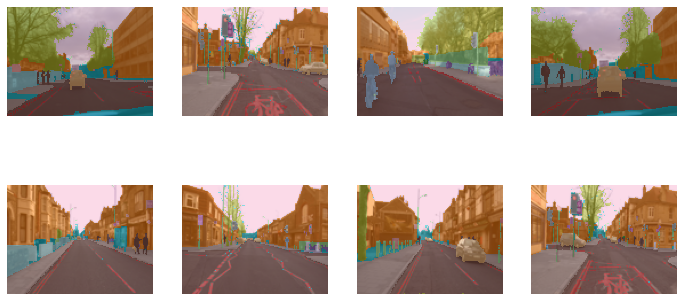

In [14]:
dls.show_batch()

In [15]:
learn=unet_learner(dls,resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [18]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,4.083777,2.706532,00:03


epoch,train_loss,valid_loss,time
0,2.184578,1.640652,00:01
1,1.794526,1.135742,00:01
2,1.546641,0.976430,00:01
3,1.345111,0.850139,00:01
4,1.191396,0.751495,00:01
5,1.076650,0.746025,00:01


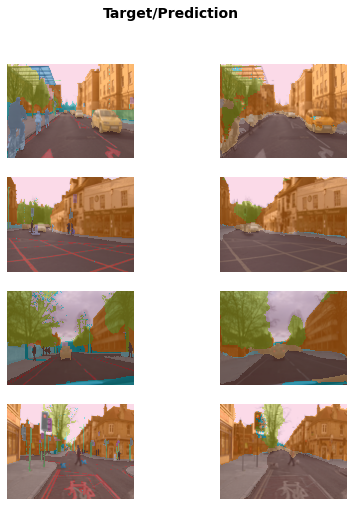

In [22]:
learn.show_results(max_n=4,figsize=(7,8))

In [24]:
inter=SegmentationInterpretation.from_learner(learn)

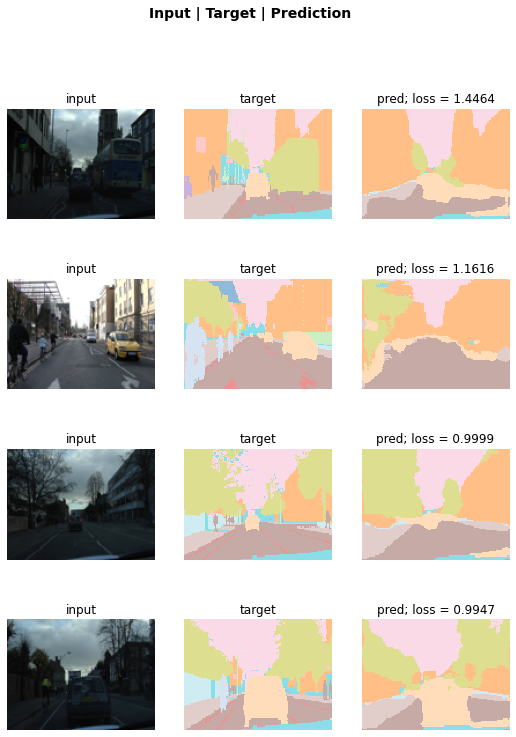

In [28]:
inter.plot_top_losses(4)